## Analyzing Netflix Data - Data Exploration and Visualisation

<center><img src="redpopcorn.jpg"></center>

In [83]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [84]:
netflix_df = pd.read_csv("netflix_data.csv")

netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [85]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [86]:
netflix_df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,description,genre
count,4812,4812,4812,4812,4812,4812,4812,4812,4812
unique,4812,2,4812,3615,4690,72,1292,4807,31
top,s2,Movie,7:19,"Raúl Campos, Jan Suter",Samuel West,United States,"January 1, 2020",A scheming matriarch plots to cut off her disa...,Dramas
freq,1,4677,1,18,10,1886,100,2,1343


In [87]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

In [88]:
type_counts = netflix_df.value_counts('type')
type_counts

type
Movie      4677
TV Show     135
dtype: int64

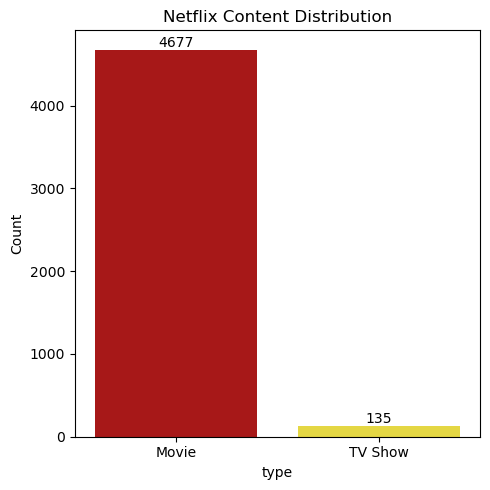

In [89]:
plt.figure(figsize=(5, 5))

bars = sns.barplot(x=type_counts.index, y=type_counts.values, palette=["#bf0000", "#FFED29"])

plt.ylabel('Count')
plt.title('Netflix Content Distribution')
plt.bar_label(bars.containers[0])
plt.tight_layout()
plt.show()

 *** Initial Statistical Summary of Netflix Content 🔍

- Content Type Distribution - Among the 4.812 entries in the Netflix dataset, movies dominate with 4.677 releases, representing approximately 97% of the total content, while TV shows make up the remaining 3%, totaling 135 releases. The Drama genre leads comprising  1.343 releases across both movies and TV shows.

- Directors - Raúl Campos and Jan Suter are the most prolific directors in the dataset, each credited with 18 titles, placing them at the forefront of Netflix’s director list.

- Cast - Samuel West leads the actor list with 10 frequent appearances in various films and shows on Netflix.

- Country - The United States is the primary contributor to Netflix’s content, accounting for 39% of all titles, making it the top country in terms of production volume.

- Date Added - January 1, 2020, marks the highest single-day spike in content uploads to Netflix, with approximately 100 titles added on that date alone. 

In [90]:
#Filtering only the Movies 
netflixMovies = netflix_df[netflix_df['type'] == 'Movie']
netflixMovies.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
5,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [91]:
#clean the data -- keeping only the needed columns! 
keep=['title','country','genre','release_year','date_added','director','duration',"description"]
netflixMovies = netflixMovies[keep]
print(netflixMovies.columns)

Index(['title', 'country', 'genre', 'release_year', 'date_added', 'director',
       'duration', 'description'],
      dtype='object')


In [92]:
#Check the data for duplicated movies 
netflixMovies['title'].duplicated().sum()

0

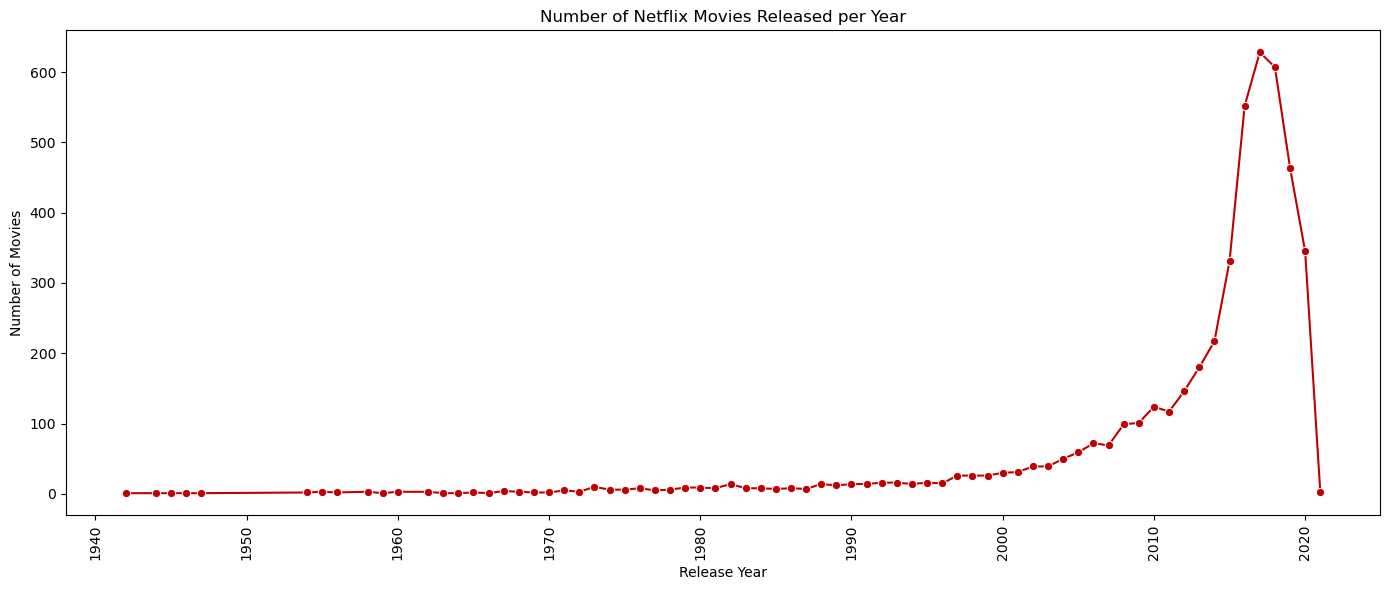

In [93]:
movie_counts_by_year = netflixMovies.value_counts("release_year")
#print(Movie_counts_by_year)

plt.figure(figsize=(14, 6))
sns.lineplot(x=movie_counts_by_year.index, y=movie_counts_by_year.values, marker='o', color='#bf0000')

plt.xticks(rotation=90)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Netflix Movies Released per Year')
plt.tight_layout()
plt.show()


Note: incomplet data for 2021

In [94]:
#movies released in the 20s
movies_released_20s = netflixMovies[netflixMovies["release_year"] >= 2000]

releases_per_year = movies_released_20s.value_counts("release_year").reset_index(name="count")

#Calculate average movie releases in the 20s
average_releases = releases_per_year['count'].mean()
print(f"Average number of movies released per year since 2000: {average_releases:.2f}")

Average number of movies released per year since 2000: 195.59


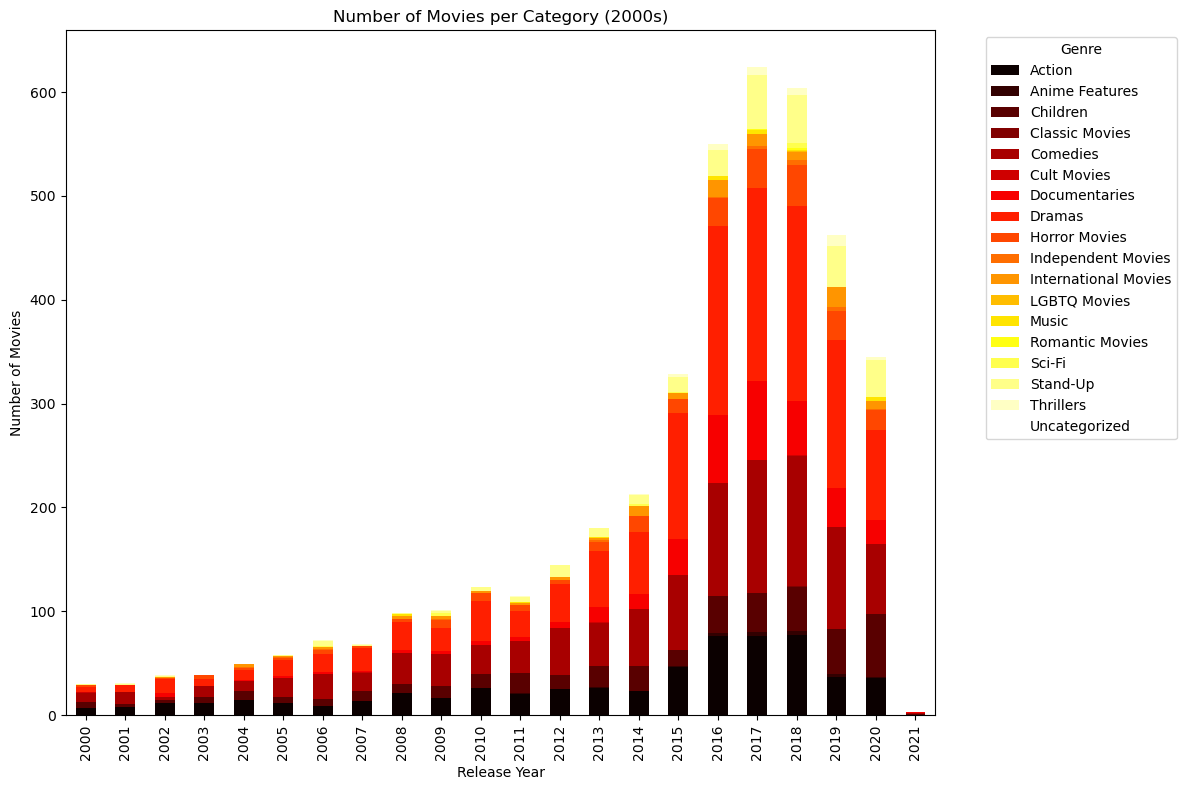

In [95]:
genre_counts = movies_released_20s.groupby(['release_year', 'genre']).size().reset_index(name='count')

# Pivot data to get genres as columns
pivot_df = genre_counts.pivot(index='release_year', columns='genre', values='count').fillna(0)

# Plot stacked barplot
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='hot')

plt.title('Number of Movies per Category (2000s)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


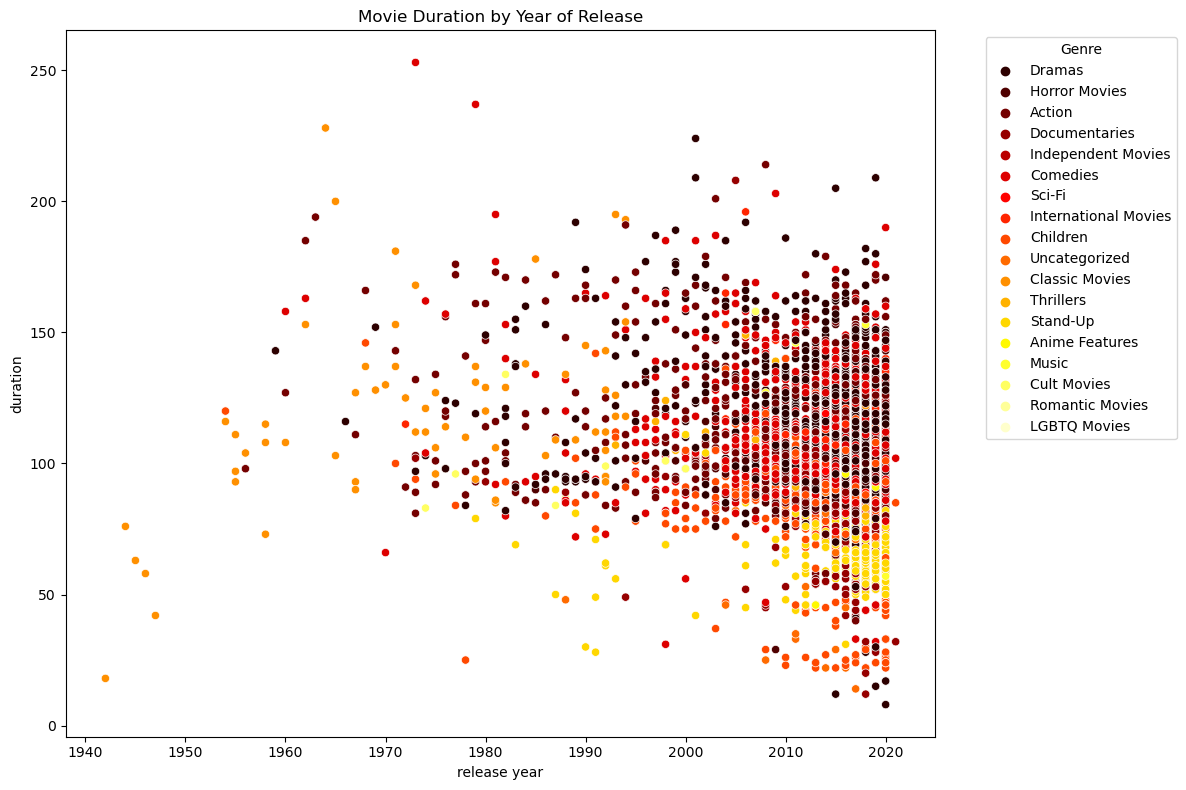

In [96]:
fig = plt.figure(figsize=(12, 8))

sns.scatterplot(data=netflixMovies, x='release_year', y='duration', hue='genre', palette='hot')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.xlabel("release year")
plt.ylabel("duration")
plt.title('Movie Duration by Year of Release')
plt.tight_layout()
plt.show()

- Netflix movie production has expanded over recent decades with an average of 195 movies produced since 2000s, with most movies falling into a standard duration range of 80–120 minutes. 
- Consistent Expansion - the overall trend reflects Netflix’s strategy of expanding its movie library both in quantity and genre variety, with Drama, Sci-Fi, and Comedies being the dominant genres, especially in the years leading up to 2020.

In [104]:
#what is the best month to launch a TV show/Movie?

movies_released_since_2016= netflixMovies[netflixMovies["release_year"] >= 2016]
movies_released_since_2016['date_added'] = pd.to_datetime(movies_released_since_2016['date_added'])

movies_released_since_2016['month']= movies_released_since_2016['date_added'].dt.month
movies_released_since_2016['year']= movies_released_since_2016['date_added'].dt.year
movies_released_since_2016.head()

C:\Users\larbi\AppData\Local\Temp\ipykernel_28380\4263157312.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\larbi\AppData\Local\Temp\ipykernel_28380\4263157312.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\larbi\AppData\Local\Temp\ipykernel_28380\4263157312.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,title,country,genre,release_year,date_added,director,duration,description,month,year
0,7:19,Mexico,Dramas,2016,2016-12-23,Jorge Michel Grau,93,After a devastating earthquake hits Mexico Cit...,12,2016
5,122,Egypt,Horror Movies,2019,2020-06-01,Yasir Al Yasiri,95,"After an awful accident, a couple admitted to ...",6,2020
7,706,India,Horror Movies,2019,2019-04-01,Shravan Kumar,118,"When a doctor goes missing, his psychiatrist w...",4,2019
9,1922,United States,Dramas,2017,2017-10-20,Zak Hilditch,103,A farmer pens a confession admitting to his wi...,10,2017
10,"2,215",Thailand,Documentaries,2018,2019-03-01,Nottapon Boonprakob,89,This intimate documentary follows rock star Ar...,3,2019


In [105]:
movies_counts_by_month_year = movies_released_since_2016.groupby(['month','year']).size().reset_index(name='count')

# Create a mapping dictionary
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Map numeric month to month name
movies_counts_by_month_year['month'] = movies_counts_by_month_year['month'].map(month_map)
#movies_counts_by_month_year.tail()

#plot -- heatmap
heatmap = px.density_heatmap(
    movies_counts_by_month_year,
    x='year',
    y='month',
    z='count',
    color_continuous_scale='hot',
    title='Movie Releases by Month and Year'
)

heatmap.update_layout(yaxis={'categoryorder':'array', 'categoryarray':[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]})
heatmap.show()


In [99]:
#Directors with the Most Appearances
print(netflixMovies.value_counts('director'))

director
Raúl Campos, Jan Suter       18
Marcus Raboy                 14
Jay Karas                    14
Cathy Garcia-Molina          13
Martin Scorsese              12
                             ..
Jon Turteltaub                1
Jon Watts                     1
Jonathan A. Rosenbaum         1
Jonathan Augustin             1
Kip Andersen, Keegan Kuhn     1
Length: 3509, dtype: int64


Raúl Campos and Jan Suter have the highest number of released movies, primarily known for their work in stand-up comedy films, while Kip Andersen and Keegan Kuhn have each released only one movie

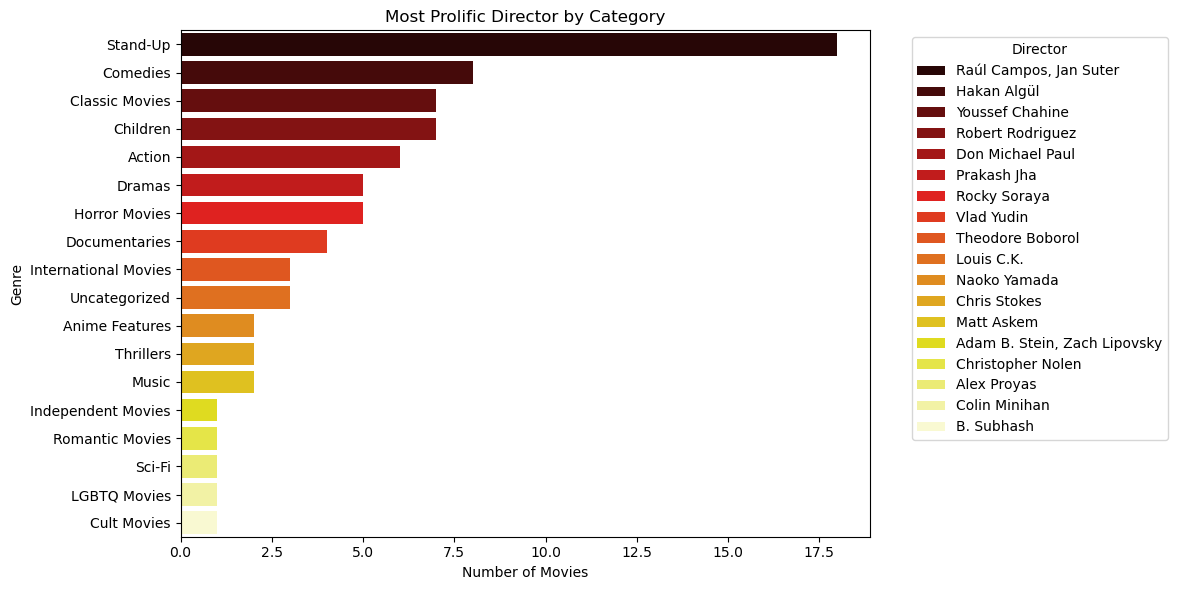

In [100]:
#which director has released the most movies for each category?
genre_director_counts = netflixMovies.groupby(['genre', 'director']).size().reset_index(name='count')

top_directors_per_genre = genre_director_counts.sort_values('count', ascending=False).drop_duplicates('genre')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_directors_per_genre, x='count', y='genre', hue='director', dodge=False, palette='hot')
plt.title('Most Prolific Director by Category')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.legend(title='Director', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [101]:
country_counts = movies_released_20s.groupby(['country']).size().reset_index(name='count')

country_counts = country_counts.sort_values('count', ascending=False)
country_counts

,country,count
66,United States,1675
25,India,778
65,United Kingdom,265
8,Canada,150
17,France,121
...,...,...
55,Somalia,1
44,Paraguay,1
18,Georgia,1
12,Croatia,1


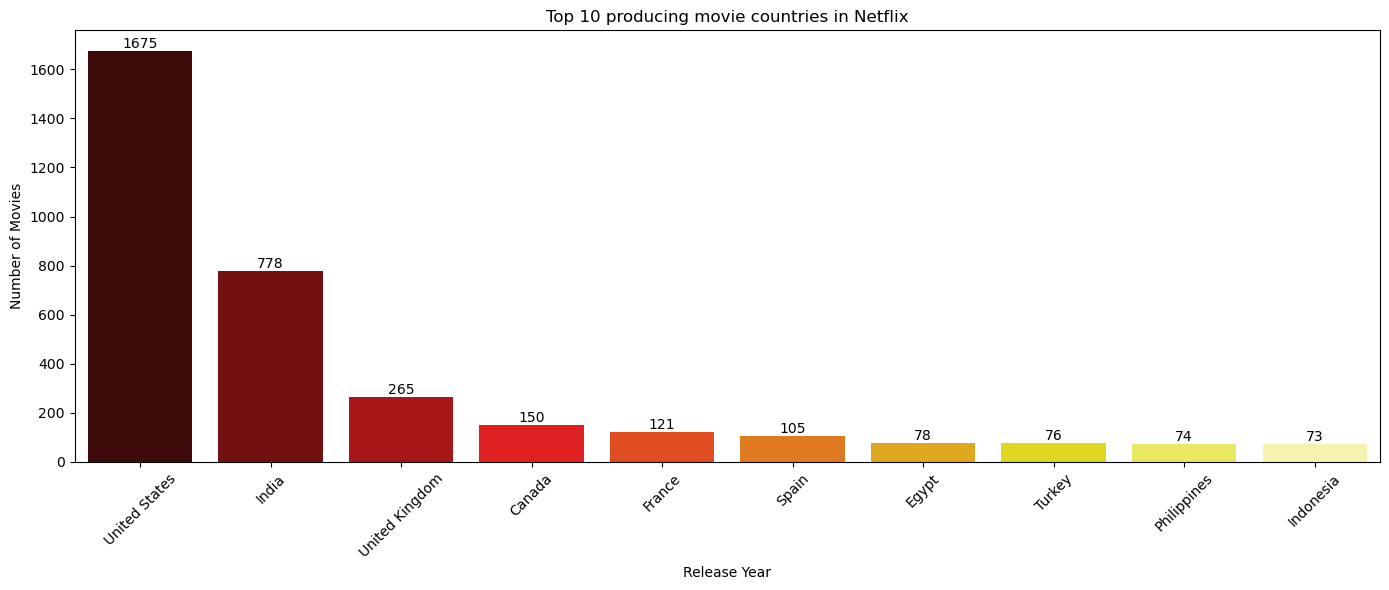

In [102]:
#Top 10 producing movie countries in Netflix
top_10_country_list = country_counts.head(10)

#plot
plt.figure(figsize=(14, 6))
bars = sns.barplot(data=top_10_country_list, x="country", y="count", palette='hot')

# Beautify
plt.xticks(rotation=45)
plt.bar_label(bars.containers[0])

plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Top 10 producing movie countries in Netflix')
plt.tight_layout()
plt.show()

- Content Investment Strategy and Global Expansion: Netflix heavily invests in content production in the USA, its home country, to attract more subscribers, releasing over 1.675 movies since the beginning of 2000s. India, being the second on the list releasing over 778 movies, signifies Netflix's strategic focus on the Indian market due to its significant population and growing demand for streaming services

In [103]:
#Which  countries has the most released movie in each category?
country_counts_by_category = movies_released_20s.groupby(['country', "genre"]).size().reset_index(name='count')

top_country_per_category = country_counts_by_category.loc[country_counts_by_category.groupby('genre')['count'].idxmax()].reset_index(drop=True)

top_country_per_category

,country,genre,count
0,United States,Action,208
1,Japan,Anime Features,17
2,United States,Children,249
3,France,Classic Movies,1
4,United States,Comedies,294
5,United States,Cult Movies,3
6,United States,Documentaries,203
7,India,Dramas,351
8,United States,Horror Movies,109
9,United States,Independent Movies,13
